# Utrecht Housing 2022 Use Case

Predict retail price for Hans.

### Import libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")

# ML libraries
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Print libraries versions
print(f"Pandas version {pd.__version__}")
print(f"Numpy version {np.__version__}")
print(f"Matplotlib version {matplotlib.__version__}")
print(f"Seaborn version {sns.__version__}")
print(f"Sklearn version {sklearn.__version__}")


Pandas version 1.5.2
Numpy version 1.23.5
Matplotlib version 3.6.2
Seaborn version 0.12.2
Sklearn version 1.2.1


### Load data

In [58]:
data_path = r"utrechthousinghuge.csv"
df = pd.read_csv(data_path, delimiter=",")

Use Pandas to load CSV.

In [59]:
df.head()

,id,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument
0,100426,3528,11.1,5.0,55.5,112.50,10.5,2,2112,5113,1932,1,494000,670000,0,1
1,100871,3528,13.6,5.0,68.0,112.50,8.0,0,2355,5218,1945,1,504000,675000,0,1
2,100936,3800,16.6,6.7,111.2,150.75,44.2,2,2656,5200,1946,1,692000,869000,0,1
3,100970,3800,18.6,6.0,111.6,108.00,39.6,2,2856,5201,1946,1,521000,628000,0,1
4,101191,3800,19.6,6.0,117.6,108.00,45.6,1,2962,5266,1950,1,526000,610000,0,1


In [60]:
df.tail()

,id,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument
1995,993057,3525,12.5,7.9,98.8,142.20,19.8,2,2252,5752,1990,2,648000,765000,1,0
1996,993131,3500,16.5,7.5,123.8,135.00,33.8,2,2650,5768,1992,1,639000,728000,0,0
1997,993444,3525,12.0,6.5,78.0,146.25,19.5,2,2204,5854,2000,2,647000,733000,1,0
1998,993873,3525,13.5,7.6,102.6,136.80,26.6,1,2352,5958,2015,2,629000,694000,1,0
1999,993963,3500,18.1,8.2,148.4,184.50,58.2,2,2814,5954,2012,2,857000,888000,1,0


In [61]:
df.sample(10)

,id,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument
1984,991514,3800,15.6,8.9,138.8,200.25,58.7,1,2557,5361,1958,1,912000,1149000,0,1
1162,621558,3800,17.6,6.8,119.7,122.40,44.9,2,2762,5365,1953,2,585000,713000,1,1
1459,742672,3525,13.7,10.1,138.4,227.25,27.3,1,2368,5667,1989,2,1020000,1220000,1,1
705,423875,3525,13.5,7.5,101.3,135.00,26.3,2,2353,5955,2009,1,621000,686000,1,0
965,540042,3528,12.1,6.8,82.3,122.40,21.1,1,2208,5008,1930,1,555000,770000,0,1
1744,883488,3525,14.1,7.3,102.9,164.25,37.2,1,2411,5862,2005,2,739000,832000,1,0
185,182893,3525,14.5,8.3,120.4,112.05,37.4,1,2452,5712,1989,1,545000,658000,0,0
522,333853,3525,12.7,8.1,102.9,145.80,8.1,0,2267,5955,2016,1,666000,736000,1,0
932,523226,3525,11.1,8.3,92.1,186.75,8.3,0,2110,5815,2001,1,821000,936000,0,0
339,251145,3800,17.2,5.5,94.6,99.00,45.1,1,2717,5255,1951,1,472000,590000,0,0


In [62]:
df.sort_values(by='zipcode').head()

,id,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument
1999,993963,3500,18.1,8.2,148.4,184.50,58.2,2,2814,5954,2012,2,857000,888000,1,0
537,343732,3500,16.5,6.5,107.3,146.25,48.8,1,2651,5907,2011,1,671000,726000,1,0
538,343971,3500,18.5,8.2,151.7,110.70,77.9,1,2853,5956,2008,1,564000,585000,1,0
985,543323,3500,16.0,8.1,129.6,109.35,48.6,1,2601,5814,1996,1,541000,621000,0,0
1407,723388,3500,19.2,8.1,155.5,109.35,74.5,1,2916,5807,2000,1,562000,602000,0,0


In [63]:
df.sort_values(by='buildyear', ascending=False).head()

,id,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument
1620,823820,3525,11.0,6.7,73.7,120.60,6.7,0,2103,5963,2018,2,541000,594000,1,0
1884,943832,3525,11.6,8.2,95.1,147.60,8.2,0,2160,5967,2018,1,666000,732000,1,0
1525,773859,3525,12.6,8.4,105.8,113.40,30.2,2,2263,5964,2018,1,538000,600000,1,0
1440,733849,3525,12.2,7.3,89.1,98.55,7.3,0,2216,5965,2017,1,465000,518000,1,0
559,353981,3500,19.2,6.5,124.8,87.75,59.8,1,2918,5968,2017,1,451000,458000,1,0


In [64]:
df.sort_values(by=['balcony','bathrooms'], ascending=False).head()

,id,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument
12,102796,3500,19.5,9.8,191.1,176.4,83.3,2,2950,5657,1984,2,858000,939000,1,1
20,103975,3500,18.5,6.8,125.8,153.0,51.0,2,2852,5965,2012,2,713000,730000,1,0
33,111780,3800,19.0,11.0,209.0,198.0,77.0,2,2900,5412,1958,2,959000,1116000,1,1
35,112928,3500,16.1,8.5,136.9,153.0,43.4,2,2610,5714,1988,2,722000,840000,1,0
40,113853,3525,12.7,8.4,106.7,151.2,14.3,2,2265,5950,2013,2,690000,765000,1,0


In [65]:
# get general info on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           2000 non-null   int64  
 1   zipcode      2000 non-null   int64  
 2   lot-len      2000 non-null   float64
 3   lot-width    2000 non-null   float64
 4   lot-area     2000 non-null   float64
 5   house-area   2000 non-null   float64
 6   garden-size  2000 non-null   float64
 7   balcony      2000 non-null   int64  
 8   x-coor       2000 non-null   int64  
 9   y-coor       2000 non-null   int64  
 10  buildyear    2000 non-null   int64  
 11  bathrooms    2000 non-null   int64  
 12  taxvalue     2000 non-null   int64  
 13  retailvalue  2000 non-null   int64  
 14  energy-eff   2000 non-null   int64  
 15  monument     2000 non-null   int64  
dtypes: float64(5), int64(11)
memory usage: 250.1 KB


In [66]:
# run the describe function over the dataframe
df.describe()

,id,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2.000000e+03,2000.000000,2000.000000
mean,550159.413500,3609.088000,14.848500,7.75520,115.236600,139.884750,35.45365,1.152500,2484.360500,5484.435000,1969.044500,1.327000,6.517150e+05,7.910245e+05,0.501500,0.510000
std,257599.198061,131.206058,2.883188,1.69576,34.370459,41.745307,23.86576,0.698203,288.399892,288.538538,26.358109,0.469235,1.829273e+05,2.109795e+05,0.500123,0.500025
min,100426.000000,3500.000000,10.000000,5.00000,50.500000,67.500000,5.00000,0.000000,2000.000000,5000.000000,1920.000000,1.000000,3.100000e+05,4.190000e+05,0.000000,0.000000
25%,330326.250000,3525.000000,12.425000,6.47500,89.100000,110.700000,13.87500,1.000000,2242.250000,5242.250000,1947.000000,1.000000,5.210000e+05,6.317500e+05,0.000000,0.000000
50%,556845.500000,3528.000000,14.850000,7.65000,109.950000,135.000000,32.00000,1.000000,2484.500000,5484.500000,1969.000000,1.000000,6.330000e+05,7.660000e+05,1.000000,1.000000
75%,763794.250000,3800.000000,17.275000,9.10000,138.325000,166.500000,52.55000,2.000000,2726.750000,5726.750000,1992.000000,2.000000,7.592500e+05,9.072500e+05,1.000000,1.000000
max,993963.000000,3800.000000,19.700000,11.00000,215.600000,247.500000,115.50000,2.000000,2969.000000,5969.000000,2018.000000,2.000000,1.162000e+06,1.428000e+06,1.000000,1.000000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           2000 non-null   int64  
 1   zipcode      2000 non-null   int64  
 2   lot-len      2000 non-null   float64
 3   lot-width    2000 non-null   float64
 4   lot-area     2000 non-null   float64
 5   house-area   2000 non-null   float64
 6   garden-size  2000 non-null   float64
 7   balcony      2000 non-null   int64  
 8   x-coor       2000 non-null   int64  
 9   y-coor       2000 non-null   int64  
 10  buildyear    2000 non-null   int64  
 11  bathrooms    2000 non-null   int64  
 12  taxvalue     2000 non-null   int64  
 13  retailvalue  2000 non-null   int64  
 14  energy-eff   2000 non-null   int64  
 15  monument     2000 non-null   int64  
dtypes: float64(5), int64(11)
memory usage: 250.1 KB


### Exploratory data analysis

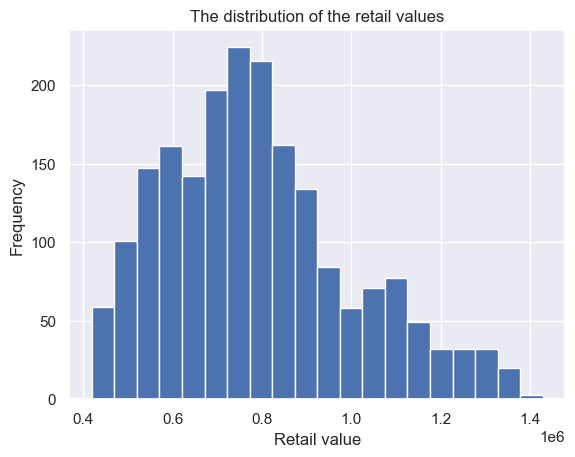

In [68]:
# select the retailvalues from the dataframe
retail_values = df["retailvalue"]

# plot the distribution with 20 bins
plt.hist(retail_values, bins=20)

# give the graph a title and labels
plt.xlabel('Retail value')
plt.ylabel('Frequency')
plt.title("The distribution of the retail values")
plt.show()

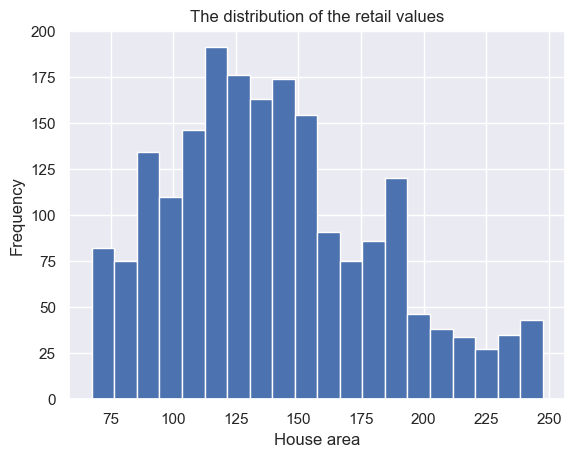

In [69]:
# select the house area from the dataframe
retail_values = df["house-area"]

# plot the distribution with 20 bins
plt.hist(retail_values, bins=20)

# give the graph a title and labels
plt.xlabel('House area')
plt.ylabel('Frequency')
plt.title("The distribution of the retail values")
plt.show()

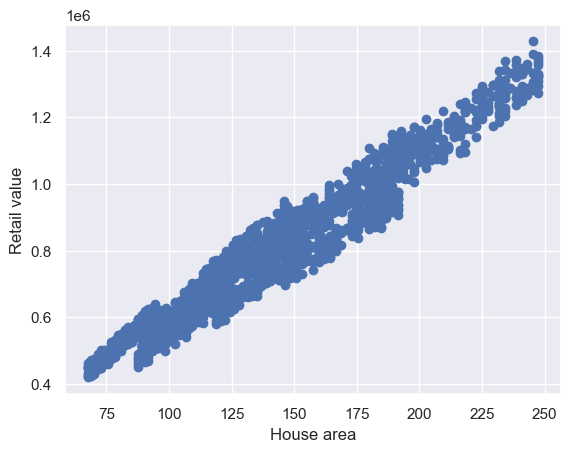

In [70]:
x = df['house-area']
y = df['retailvalue']
plt.scatter(x, y)
plt.xlabel('House area')
plt.ylabel('Retail value')
plt.show()

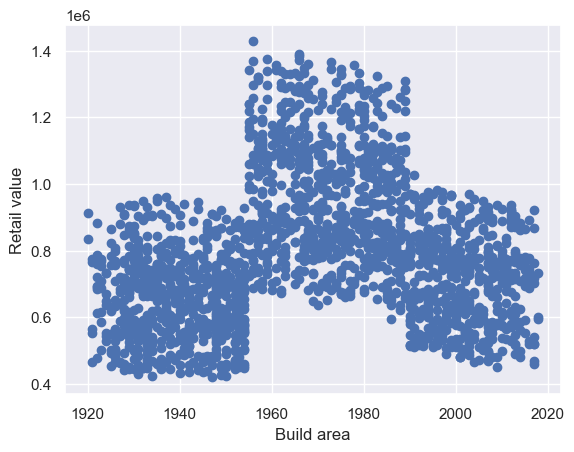

In [71]:
x = df['buildyear']
y = df['retailvalue']
plt.scatter(x, y)
plt.xlabel('Build area')
plt.ylabel('Retail value')
plt.show()

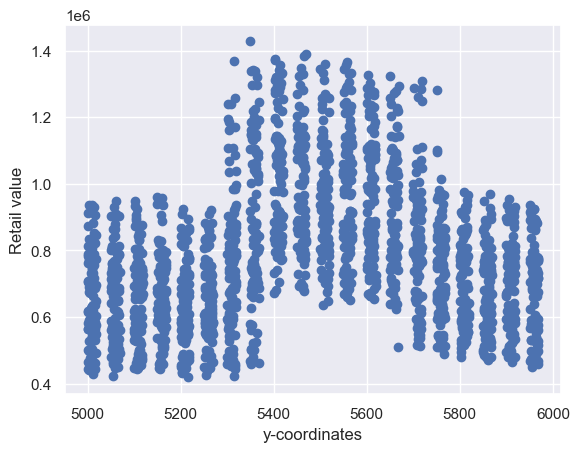

In [72]:
x = df['y-coor']
y = df['retailvalue']
plt.scatter(x, y)
plt.xlabel('y-coordinates')
plt.ylabel('Retail value')
plt.show()

Select features:

In [73]:
# select the features
X = df[["house-area"]]
y = df["retailvalue"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Train a model:

In [74]:
# build the model
model = LinearRegression()

# fit the data to the model
model.fit(X_train, y_train)

# predict new value
y_predict = model.predict(X_test)

print(f"Mean squared error: {mean_squared_error(y_test, y_predict):.2f}")
print(f"Mean absolute error: {mean_absolute_error(y_test, y_predict):.2f}")
print(f"R squared: {model.score(X_test, y_test):.4f}")


Mean squared error: 2516538374.13
Mean absolute error: 41205.65
R squared: 0.9467


For instance, if the data has outliers or noise, MAE might be more reliable than MSE as it is less affected by them. Likewise, if the data is skewed or has a long tail, MSE might be more appropriate than MAE as it can capture the variability better.

What do these numbers mean? The MSE means that, on average, your model is off by the square root of 2516538374.13, which is about 50165.11. The MAE means that, on average, your model is off by 41205.65. The MSE is much higher than the MAE, which suggests that your model has some large errors that inflate the MSE. These could be due to outliers, noise, or nonlinearity in the data. The MAE gives you a more realistic estimate of the average error, but it might not reflect the severity of the worst errors.

The value for R-squared can range from 0 to 1 where:

-0 indicates that the response variable cannot be explained by the predictor variable at all.

-1 indicates that the response variable can be perfectly explained without error by the predictor variables.

The R-squared of the model turns out to be 0.9482.

This means that ~95% of the variation in the retail values can be explained by house-area, number of bathrooms and the energy-efficient indicator.

In general, models with higher R-squared values are preferred because it means the set of predictor variables in the model is capable of explaining the variation in the response variable well.

<AxesSubplot: >

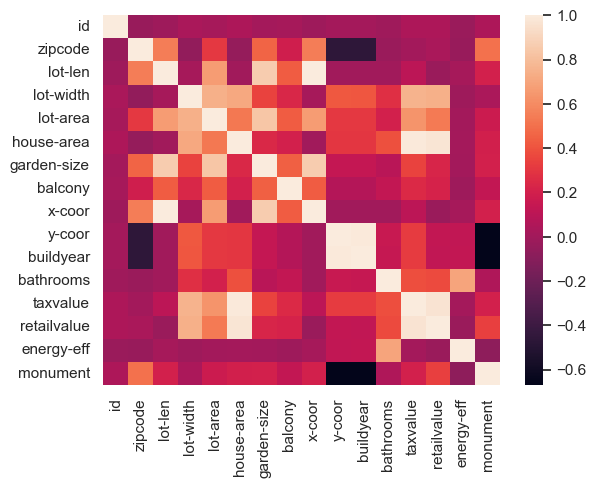

In [75]:
# use the corr function to display the correlation between all the features
data_corr = df.corr()
sns.heatmap(data_corr)

### Select features

In [76]:
# select the features
X = df[["house-area", "bathrooms", "energy-eff"]]
y = df["retailvalue"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [77]:
# build the model
model = LinearRegression()

# fit the data to the model
model.fit(X_train, y_train)

# predict new value
y_predict = model.predict(X_test)

print(f"Mean squared error: {mean_squared_error(y_test, y_predict):.2f}")
print(f"Mean absolute error: {mean_absolute_error(y_test, y_predict):.2f}")
print(f"R squared: {model.score(X_test, y_test):.4f}")

Mean squared error: 2444515460.65
Mean absolute error: 41174.74
R squared: 0.9482


Select better features

In [78]:
# select the features
X = df[["house-area","garden-size","balcony","buildyear","bathrooms"]]
y = df["retailvalue"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [79]:
# build the model
model = LinearRegression()

# fit the data to the model
model.fit(X_train, y_train)

# predict new value
y_predict = model.predict(X_test)

print(f"Mean squared error: {mean_squared_error(y_test, y_predict):.2f}")
print(f"Mean absolute error: {mean_absolute_error(y_test, y_predict):.2f}")
print(f"R squared: {model.score(X_test, y_test):.4f}")

Mean squared error: 1358084037.07
Mean absolute error: 29279.96
R squared: 0.9712


Try with all variables

In [80]:
# select the features
X = df.drop("retailvalue", axis=1)
y = df["retailvalue"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [81]:
# build the model
model = LinearRegression()

# fit the data to the model
model.fit(X_train, y_train)

# predict new value
y_predict = model.predict(X_test)

print(f"Mean squared error: {mean_squared_error(y_test, y_predict):.2f}")
print(f"Mean absolute error: {mean_absolute_error(y_test, y_predict):.2f}")
print(f"R squared: {model.score(X_test, y_test):.4f}")

Mean squared error: 417112682.15
Mean absolute error: 16746.20
R squared: 0.9912


# TEST: HANS's HOUSE

Input:

Zipcode 3553, build year 1930, house-area 159, lot-area 47, garden-size 10.5, balcony 0, bathrooms 1, monument not (or 0), energy-eff not (or 0)

Ouput:

Predict retail value

We need to train a model on features (columns) that match the Hans's House data, otherwise the model does not work.

In [82]:
# select the features matching Hans's house data
X = df[["zipcode", "buildyear", "house-area", "lot-area", "garden-size", "balcony", "bathrooms", "monument", "energy-eff"]]
y = df["retailvalue"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [83]:
# build the model
model = LinearRegression()

# fit the data to the model
model.fit(X_train, y_train)

# predict new value
y_predict = model.predict(X_test)

print(f"Mean squared error: {mean_squared_error(y_test, y_predict):.2f}")
print(f"Mean absolute error: {mean_absolute_error(y_test, y_predict):.2f}")
print(f"R squared: {model.score(X_test, y_test):.4f}")

Mean squared error: 704920586.10
Mean absolute error: 20550.75
R squared: 0.9851


In [84]:
model.predict([[3553, 1930, 159, 47, 5.5, 0, 1, 0, 0]])

/Users/georgianamanolache/opt/anaconda3/envs/fruit/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([881962.13420835])